TAREA 5 - REGRESIÓN LOGISTICA 

Olga Yamile Neme Castro

## 1. Análisis Exploratorio

In [48]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [117]:
Datos = pd.read_csv('Titanic-Dataset.csv')

In [119]:
Datos.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [121]:
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [123]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

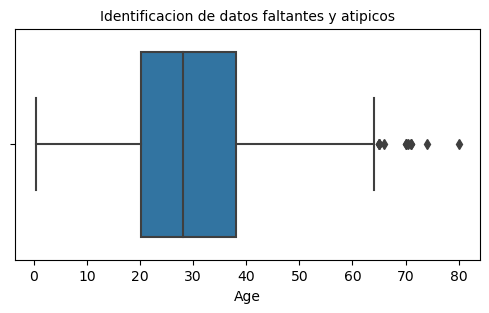

In [41]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=10)

Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

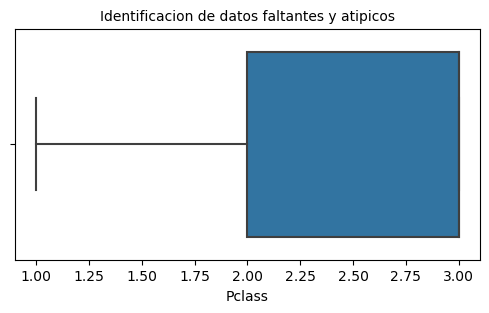

In [62]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Pclass'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=10)

## 2. Preprocesamiento de Datos

In [125]:
Datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [137]:
Datos['Edad']=Datos['Age'].fillna(method = 'ffill')
Datos.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Edad
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,35.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,27.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,14.0


In [139]:
Datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Edad             0
dtype: int64

Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

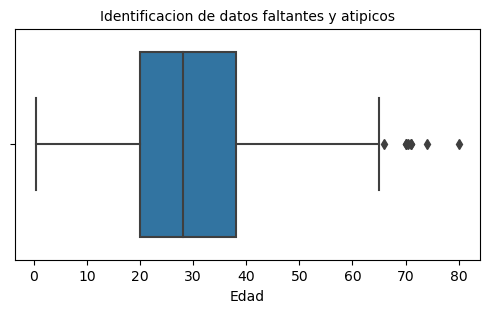

In [141]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Edad'])
plt.title('Identificacion de datos faltantes y atipicos', fontsize=10)

In [145]:
Edad_minimo=1
Edad_maximo=70
Total_Atipicos=((Datos['Edad']<Edad_minimo)|(Datos['Edad']>Edad_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 15


In [147]:
Datos=Datos[(Datos['Edad']<Edad_maximo)&(Datos['Edad']>Edad_minimo)]

In [149]:
Total_Atipicos=((Datos['Edad']<Edad_minimo)|(Datos['Edad']>Edad_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [151]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 866 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  866 non-null    int64  
 1   Survived     866 non-null    int64  
 2   Pclass       866 non-null    int64  
 3   Name         866 non-null    object 
 4   Sex          866 non-null    object 
 5   Age          693 non-null    float64
 6   SibSp        866 non-null    int64  
 7   Parch        866 non-null    int64  
 8   Ticket       866 non-null    object 
 9   Fare         866 non-null    float64
 10  Cabin        199 non-null    object 
 11  Embarked     864 non-null    object 
 12  Edad         866 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 94.7+ KB


In [196]:
Datos1 = Datos.loc[:, ['Pclass', 'Sex', 'Edad', 'Survived']]
Datos1.head()

,Pclass,Sex,Edad,Survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [210]:
sex_ = {'male':1, 'female':0}
Datos1['Sex'] = Datos1['Sex'].map(sex_)
Datos1.head()

,Pclass,Sex,Edad,Survived
0,3,1,22.0,0
1,1,0,38.0,1
2,3,0,26.0,1
3,1,0,35.0,1
4,3,1,35.0,0


## 3. Seleccionar las carácteristicas más relevantes

 Sobreviviente: valor que determina si la persona fallecio (0) o si sobrevivio (1)

In [212]:
Datos1['Survived'].value_counts()

Survived
0    539
1    327
Name: count, dtype: int64

In [200]:
Datos1[['Survived']].head(30)

,Survived
0,0
1,1
2,1
3,1
4,0
5,0
6,0
7,0
8,1
9,1


## 4. Dividir el dataset en Train y Test

In [214]:
X = Datos1.drop('Survived',axis=1)  
Y = Datos1['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [216]:
print (X_train)

     Pclass  Sex  Edad
142       3    0  24.0
462       1    1  47.0
394       3    0  24.0
207       3    1  26.0
772       2    0  57.0
..      ...  ...   ...
473       2    0  23.0
722       2    1  34.0
217       2    1  42.0
131       3    1  20.0
61        1    0  38.0

[649 rows x 3 columns]


In [218]:
print (Y_train)

142    1
462    0
394    1
207    1
772    0
      ..
473    1
722    0
217    0
131    0
61     1
Name: Survived, Length: 649, dtype: int64


## 5. Entrenar el modelo

In [220]:
modelo_regresion = LogisticRegression(solver = "liblinear") 
modelo_regresion.fit (X_train , Y_train)   

Prediccion = modelo_regresion.predict(X_test)

In [222]:
print (Y_test)

573    1
72     0
485    0
648    0
154    0
      ..
133    1
115    0
448    1
875    1
321    0
Name: Survived, Length: 217, dtype: int64


In [224]:
print (Prediccion)

[1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0
 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1
 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0]


## 6. Evaluar el desempeño del modelo

In [227]:
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       135
           1       0.73      0.70      0.71        82

    accuracy                           0.79       217
   macro avg       0.78      0.77      0.77       217
weighted avg       0.79      0.79      0.79       217



## 7. Realizar las diferentes gráficas

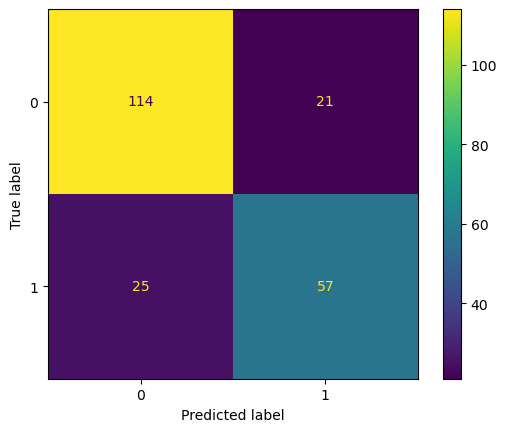

In [230]:
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

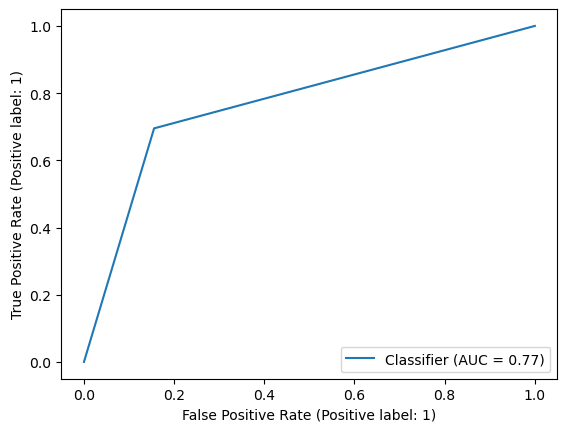

In [232]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

## 8. Interpretar resultados

Del desempeño del modelo se puede describir:

Precisión: La precisión para la clase "Sobreviviente" es 0,73, lo que significa que el 73% de los predichos como sobrevivientes por el modelo realmente sobrevivieron.

Recall: El Recall para la clase "Sobreviviente" es 0,70, lo que indica que el modelo identificó correctamente al 70% de todos los sobrevivientes.

F1 Score: La puntuación F1 para la clase "Sobreviviente" es 0,71, lo que indica un equilibrio entre precisión y recall.

De la Matriz de Confusión podemos interpretar:

Verdaderos negativos: el recuento de observaciones que un clasificador predijo correctamente como falso 114

Verdaderos positivos: el recuento de observaciones que un clasificador predijo correctamente como Verdadero 57

Falsos positivos: el recuento de observaciones que un clasificador predijo incorrectamente como Verdaderas 21

Falsos negativos: el recuento de observaciones que un clasificador predijo incorrectamente como falso 25

De la curva de precisión del modelo se puede interpretar:

El AUC es 0,77 lo que significa que el 77 % de las predicciones del clasificador son correctas en todos los umbrales de clasificación.